# HW1 Gradient Descent

## Exercise 1: GD on a 1D Function

For $\mathcal{L}(\Theta) = (\Theta - 3)^2 + 1$,

1. The gradient is: $\frac{d\mathcal{L}}{d\Theta} = 2(\Theta - 3)$
2. The Gradient Descent with different step sizes:

In [68]:
import matplotlib.pyplot as plt
import numpy as np

def GD(l, grad_l, theta_0, eta, maxit, tolL=1e-6, toltheta=1e-6):
    theta_list = [theta_0]
    l_list = [l(theta_0)]
    for k in range(maxit):
        # GD step
        theta = theta_0 - eta * grad_l(theta_0)

        theta_list.append(theta)
        l_list.append(l(theta))

        # Check stopping criteria
        if (np.linalg.norm(grad_l(theta)) < tolL) or (np.linalg.norm(theta - theta_0) < toltheta):
            break

        # Update of theta_0
        theta_0 = theta

    return theta, k, theta_list, l_list

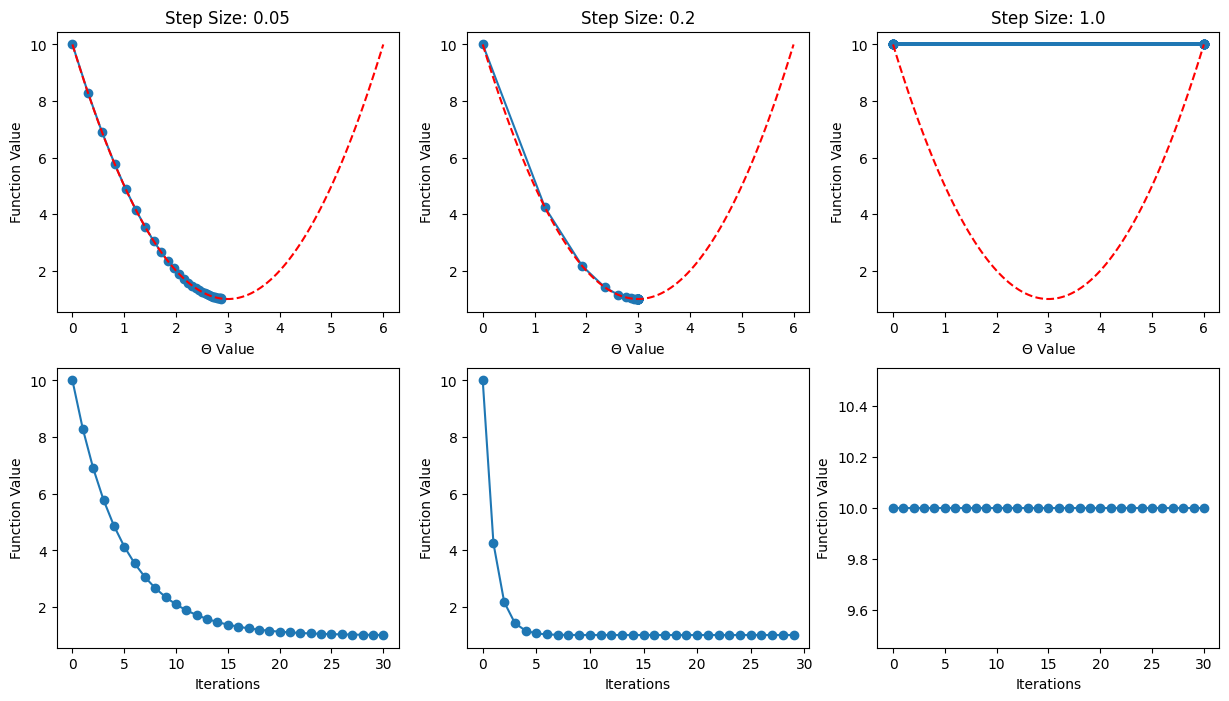

In [69]:
x_0 = 0
eta_list = [0.05, 0.2, 1.0]
steps = 30

x_list = np.linspace(0, 6, 100)
y_list = (x_list - 3) ** 2 + 1

figure, axes = plt.subplots(2, 3, figsize=(15, 8))

for i, eta in enumerate(eta_list):

    x, _, x_history, y_history = GD(
        l=lambda x: (x - 3) ** 2 + 1,
        grad_l=lambda x: 2 * (x - 3),
        theta_0=x_0,
        eta=eta,
        maxit=steps,
    )

    axes[0, i].plot(x_history, y_history, marker='o')
    axes[0, i].set_title(f'Step Size: {eta}')
    axes[0, i].set_xlabel('$\\Theta$ Value')
    axes[0, i].set_ylabel('Function Value')

    axes[0, i].plot(x_list, y_list, 'r--', label='Function')

    axes[1, i].plot(range(len(y_history)), y_history, marker='o')
    # axes[1, i].set_title(f'Step Size: {eta}')
    axes[1, i].set_xlabel('Iterations')
    axes[1, i].set_ylabel('Function Value')

## Exercise 2: Backtracking Line Search

In [70]:
def backtracking(L, grad_L, theta, eta0=1.0, beta=0.5, c=1e-4):
    """
    Return a step size eta that satisfies the Armijo condition:
        L(theta - eta*g) <= L(theta) - c * eta * ||g||^2
    Inputs:
        - L:      R^n -> R
        - grad_L: R^n -> R^d
        - theta:  current point (np.ndarray)
        - eta0:   initial step size
        - beta:   shrinking factor in (0,1)
        - c:      Armijo constant in (0,1)
    """
    eta = eta0
    g = grad_L(theta)
    g_norm2 = np.dot(g, g)
    while L(theta - eta * g) > L(theta) - c * eta * g_norm2:
        eta *= beta
    return eta

def GD_backtracking(l: callable, grad_l: callable, theta_0: np.ndarray, maxit:int = 30, init_step_size=1.0, tolL=1e-6, toltheta=1e-6):
    x_list = [theta_0]
    y_list = [l(theta_0)]

    for k in range(maxit):
        # Compute eta
        eta = backtracking(l, grad_l, theta_0, eta0=init_step_size)

        # GD step
        theta = theta_0 - eta * grad_l(theta_0)

        x_list.append(theta)
        y_list.append(l(theta))

        # Check stopping criteria
        if (np.linalg.norm(grad_l(theta)) < tolL) or (np.linalg.norm(theta - theta_0) < toltheta):
            break

        # Update of theta_0
        theta_0 = theta

    return theta, k, x_list, y_list

In [5]:
def L(theta):
    return theta**4 - 3*theta**3 + 2

def grad_L(theta):
    return 4*theta**3 - 9*theta**2

Initial step size $\eta_0 = 1.0$

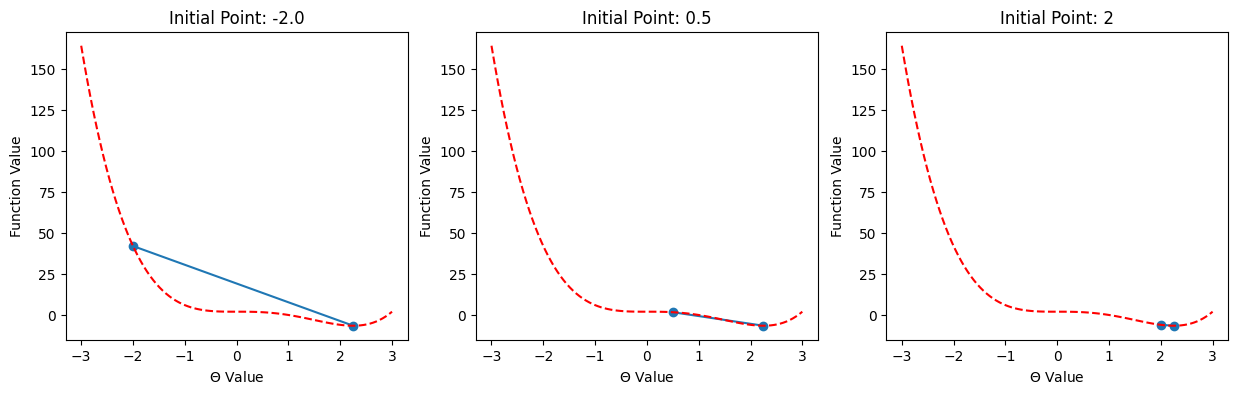

In [74]:
x_0_list = [-2.0, 0.5, 2]
domain = np.linspace(-3, 3, 100)

figure, axes = plt.subplots(1, 3, figsize=(15, 4))

for i, x_0 in enumerate(x_0_list):

    x, _, x_history, y_history = GD_backtracking(
        l=L,
        grad_l=grad_L,
        theta_0=x_0,
        maxit=20,
        tolL=1e-10,
        toltheta=1e-10,
        init_step_size=1.0
    )

    axes[i].plot(x_history, y_history, marker='o')
    axes[i].set_title(f'Initial Point: {x_0}')
    axes[i].set_xlabel('$\\Theta$ Value')
    axes[i].set_ylabel('Function Value')

    axes[i].plot(domain, L(domain), 'r--', label='Function')


Initial step size $\eta_0 = 0.02$

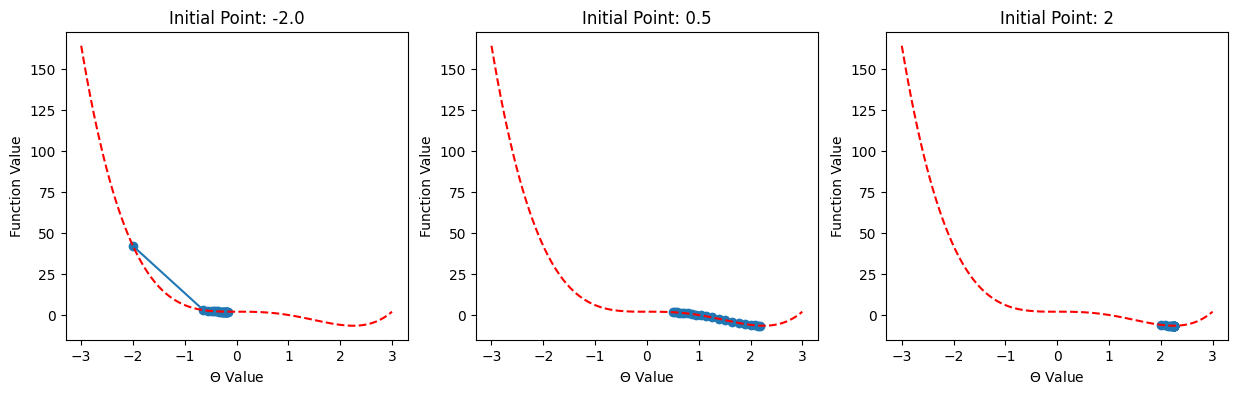

In [75]:
x_0_list = [-2.0, 0.5, 2]
domain = np.linspace(-3, 3, 100)

figure, axes = plt.subplots(1, 3, figsize=(15, 4))

for i, x_0 in enumerate(x_0_list):

    x, _, x_history, y_history = GD_backtracking(
        l=L,
        grad_l=grad_L,
        theta_0=x_0,
        maxit=20,
        tolL=1e-10,
        toltheta=1e-10,
        init_step_size=0.02
    )

    axes[i].plot(x_history, y_history, marker='o')
    axes[i].set_title(f'Initial Point: {x_0}')
    axes[i].set_xlabel('$\\Theta$ Value')
    axes[i].set_ylabel('Function Value')

    axes[i].plot(domain, L(domain), 'r--', label='Function')


## Exercise 3: GD in 2D

Consider the quadratic function:

$$
\begin{split} \mathcal{L}(\Theta) = \tfrac{1}{2}\,\Theta^T A\,\Theta, \qquad A = \begin{bmatrix}1 & 0 \\ 0 & 25\end{bmatrix}. \end{split}
$$

1. The gradient is: $\nabla_{\Theta} \mathcal{L}(\Theta) = A \Theta$

In [125]:
import numpy as np
import matplotlib.pyplot as plt

def quad_levelsets(A, xlim=(-3,3), ylim=(-3,3), ngrid=400,
                   ncontours=12, title=None, axes=None, equal_aspect=False):
    axes = plt.gca() if axes is None else axes

    xs = np.linspace(xlim[0], xlim[1], ngrid)
    ys = np.linspace(ylim[0], ylim[1], ngrid)
    X, Y = np.meshgrid(xs, ys)
    Z = 0.5*(A[0,0]*X**2 + 2*A[0,1]*X*Y + A[1,1]*Y**2)  # theta^T A theta, left-multiplied convention
    cs = axes.contour(X, Y, Z, levels=ncontours)
    axes.clabel(cs, inline=True, fontsize=8)
    axes.axhline(0, lw=0.5, color='k')
    axes.axvline(0, lw=0.5, color='k')
    if equal_aspect:
        axes.set_aspect('equal', 'box')
    if title:
        axes.set_title(title)
    axes.set_xlabel(r'$\theta_1$')
    axes.set_ylabel(r'$\theta_2$')
    axes.grid(alpha=0.2)
    # plt.show()

A = np.diag([1.0, 25.0])
# quad_levelsets(A, title='Level sets of $\\frac{1}{2} \\theta^T A \\theta$', xlim=(-10,10), ylim=(-5,5))

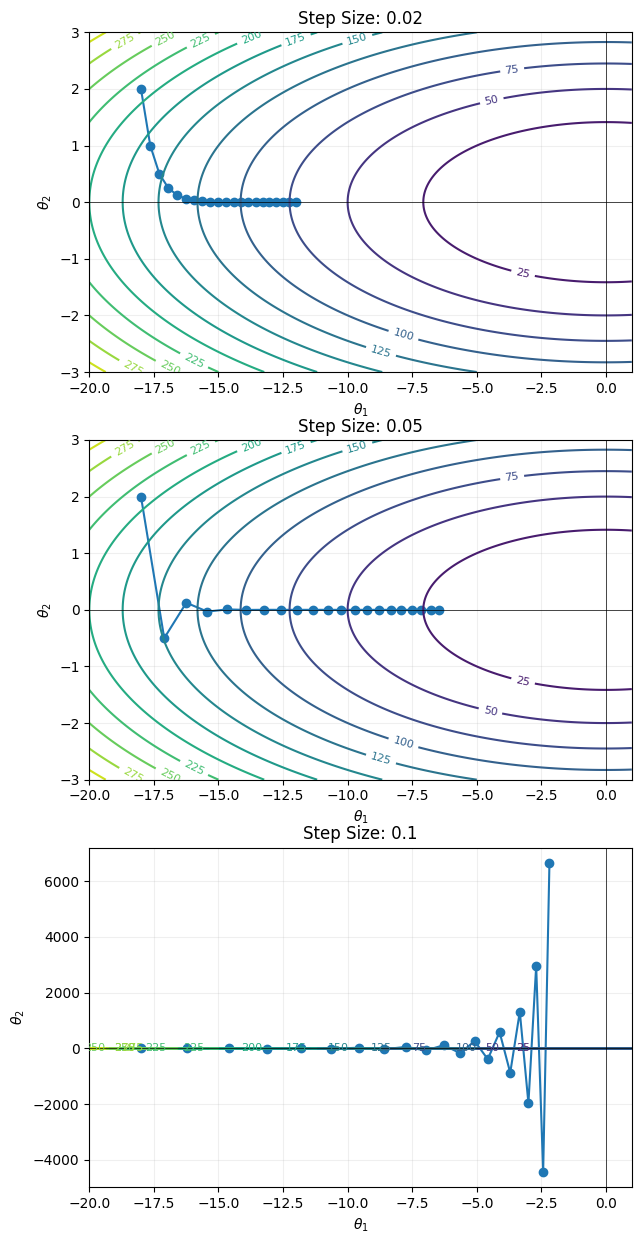

In [126]:
step_size_list = [0.02, 0.05, 0.1]
fig_num = len(step_size_list)
figure, axes = plt.subplots(fig_num, 1, figsize=(7, 5 * fig_num))
x_0 = np.array([-18.0, 2.0])


for i, eta in enumerate(step_size_list):

    _, _, x_history, _ = GD(
        l=lambda x: 0.5 * x.T @ A @ x,
        grad_l=lambda x: A @ x,
        theta_0=x_0,
        eta=eta,
        maxit=20,
    )

    axes[i].plot([x[0] for x in x_history], [x[1] for x in x_history], marker='o')
    axes[i].set_title(f'Step Size: {eta}')

    quad_levelsets(A, xlim=(-20,1), ylim=(-3,3), axes=axes[i])


## Exercise 4: Exact Line Search vs Backtracking

$$
\begin{split} \mathcal{L}(\Theta) = \frac{1}{2}\Theta^T A \Theta,\qquad A=\begin{bmatrix}5 & 0\\0 & 2\end{bmatrix}. \end{split}
$$


In [97]:
def GD_exact_line_search(l: callable, grad_l: callable, theta_0: np.ndarray, maxit:int = 30, tolL=1e-6, toltheta=1e-6):
    x_list = [theta_0]
    y_list = [l(theta_0)]

    for k in range(maxit):
        # Compute eta
        g = grad_l(theta_0)
        eta = (g.T @ g) / (g.T @ A @ g)

        # GD step
        theta = theta_0 - eta * grad_l(theta_0)

        x_list.append(theta)
        y_list.append(l(theta))

        # Check stopping criteria
        if (np.linalg.norm(grad_l(theta)) < tolL) or (np.linalg.norm(theta - theta_0) < toltheta):
            break

        # Update of theta_0
        theta_0 = theta

    return theta, k, x_list, y_list

In [132]:
def L(theta):
    return 0.5 * theta.T @ A @ theta

def grad_L(theta):
    return A @ theta

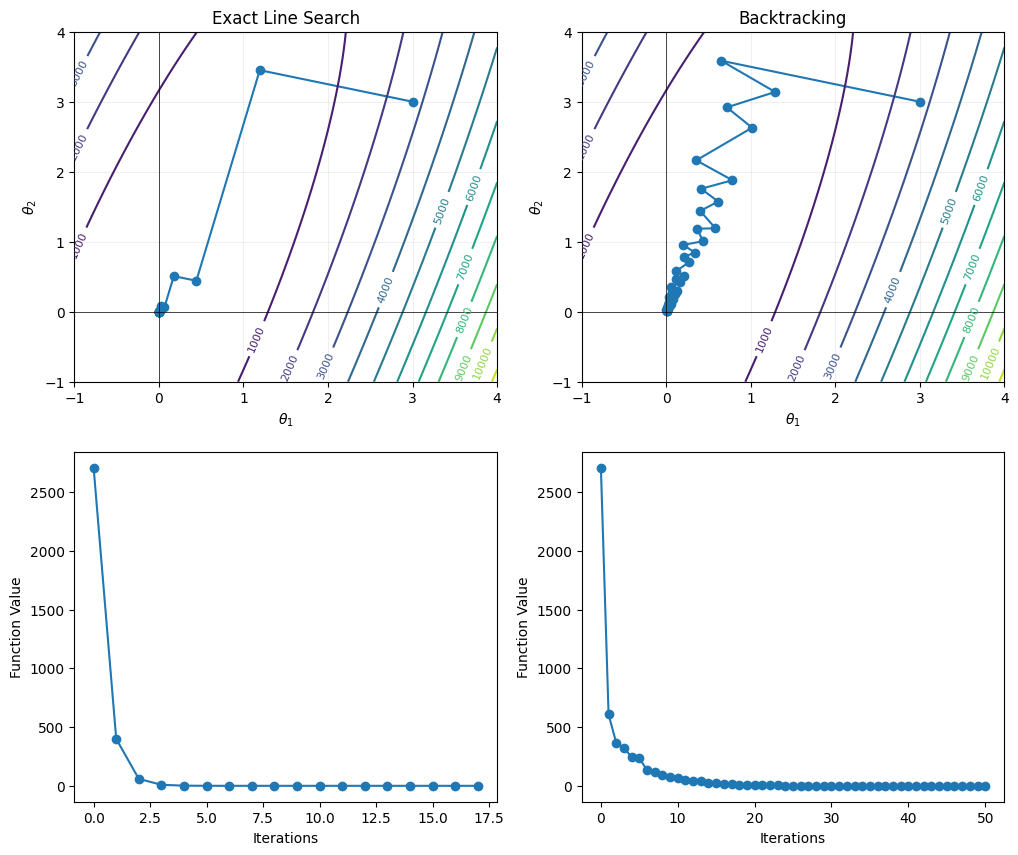

In [133]:
theta_0 = np.array([3, 3])

figure, axes = plt.subplots(2, 2, figsize=(12, 10))

_, _, x_history, y_history = GD_exact_line_search(
    l=L,
    grad_l=grad_L,
    theta_0=theta_0,
    maxit=30,
)
axes[0, 0].plot([x[0] for x in x_history], [x[1] for x in x_history], marker='o')
quad_levelsets(A, xlim=(-1,4), ylim=(-1,4), axes=axes[0,0], title='Exact Line Search')
axes[1,0].plot(range(len(y_history)), y_history, marker='o')
axes[1,0].set_xlabel('Iterations')
axes[1,0].set_ylabel('Function Value')

_, _, x_history, y_history = GD_backtracking(
        l=L,
        grad_l=grad_L,
        theta_0=theta_0,
        init_step_size=1.0,
        maxit=50,
    )

axes[0, 1].plot([x[0] for x in x_history], [x[1] for x in x_history], marker='o')
quad_levelsets(A, xlim=(-1,4), ylim=(-1,4), axes=axes[0,1], title='Backtracking')
axes[1,1].plot(range(len(y_history)), y_history, marker='o')
axes[1,1].set_xlabel('Iterations')
axes[1,1].set_ylabel('Function Value')

plt.show()


## Exercise 5: Gradient Descent on the Rosenbrock Function

$$
 \mathcal{L}(\Theta) = (1 - \Theta_1)^2 + 100(\Theta_2 - \Theta_1^2)^2,
$$

In [164]:
def L(theta):
    return (1 - theta[0])**2 + 100 * (theta[1] - theta[0]**2)**2

def grad_L(theta):
    dL_dtheta1 = -2 * (1 - theta[0]) - 400 * theta[0] * (theta[1] - theta[0]**2)
    dL_dtheta2 = 200 * (theta[1] - theta[0]**2)
    return np.array([dL_dtheta1, dL_dtheta2])

A = np.array([[1202, -400], [-400, 200]])

In [172]:
def levelsets_rosenbrock(xlim=(-2,2), ylim=(-1,3), a=1, b=100, ngrid=400,
                   ncontours=12, title=None, axes=None):
    r"""
    plot level sets of the Rosenbrock function.
    $$ \mathcal{L}(\Theta) = (a - \Theta_1)^2 + b(\Theta_2 - \Theta_1^2)^2  $$
    """
    axes = plt.gca() if axes is None else axes

    xs = np.linspace(xlim[0], xlim[1], ngrid)
    ys = np.linspace(ylim[0], ylim[1], ngrid)
    X, Y = np.meshgrid(xs, ys)
    Z = (1 - X)**2 + 100 * (Y - X**2)**2
    cs = axes.contour(X, Y, Z, levels=ncontours)
    axes.clabel(cs, inline=True, fontsize=8)
    axes.axhline(0, lw=0.5, color='k')
    axes.axvline(0, lw=0.5, color='k')
    if title:
        axes.set_title(title)
    axes.set_xlabel(r'$\theta_1$')
    axes.set_ylabel(r'$\theta_2$')
    axes.grid(alpha=0.2)

Gradient descent using constant step size and the backtracking algorithm

In [173]:
init_points = [np.array([-1.5, 2.0]),
               np.array([-1.0, 0.0]),
               np.array([0.0, 2.0]),
               np.array([1.5, 1.5])]
max_it = 3000
num_points = len(init_points)


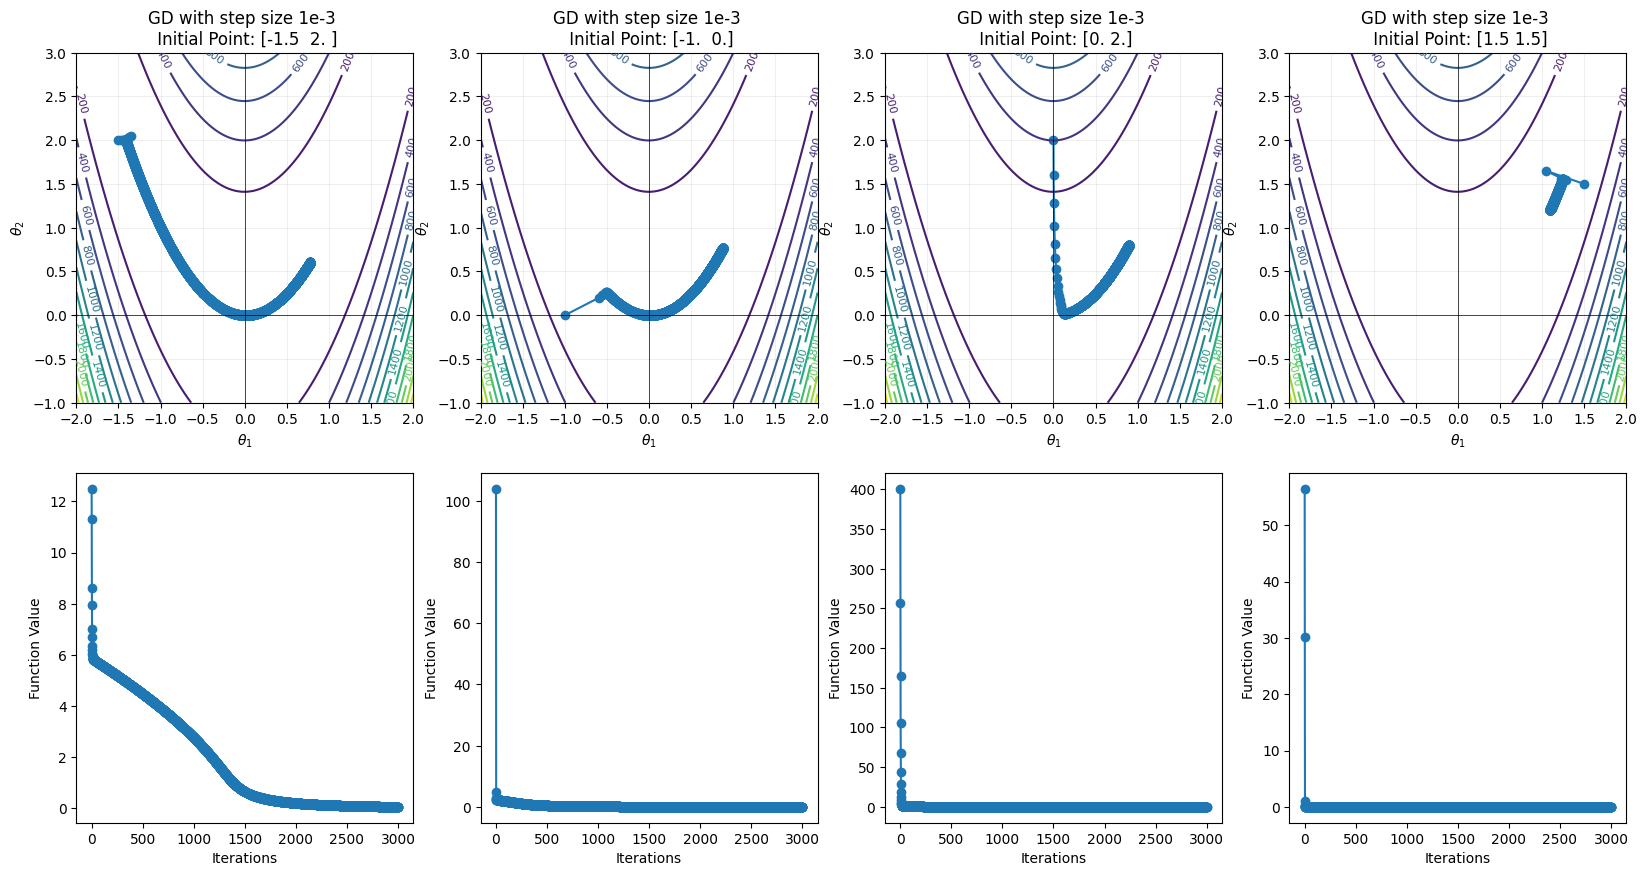

In [174]:
figure, axes = plt.subplots(2, num_points, figsize=(5 * num_points, 10))

for i, theta_0 in enumerate(init_points):

    _, _, x_history, y_history = GD(
        l=L,
        grad_l=grad_L,
        theta_0=theta_0,
        eta=1e-3,
        maxit=max_it,
    )

    axes[0, i].plot([x[0] for x in x_history], [x[1] for x in x_history], marker='o')
    levelsets_rosenbrock(
                   xlim=(-2,2), ylim=(-1,3), axes=axes[0, i],
                   title=f'GD with step size 1e-3 \n Initial Point: {theta_0}', ncontours=15,)

    axes[1, i].plot(range(len(y_history)), y_history, marker='o')
    axes[1, i].set_xlabel('Iterations')
    axes[1, i].set_ylabel('Function Value')


plt.show()

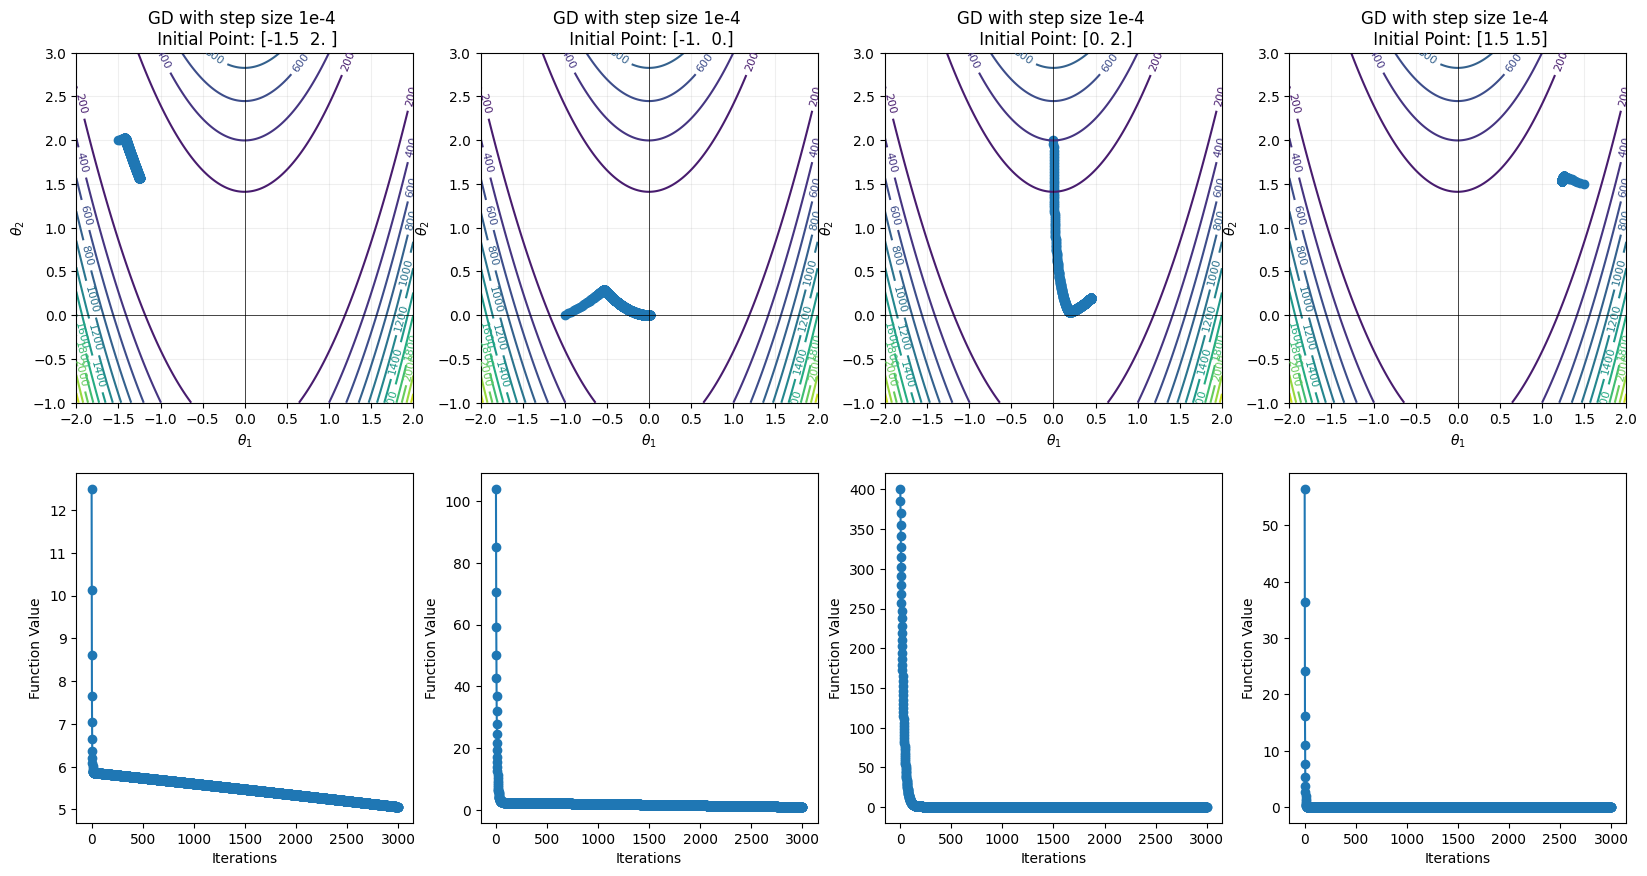

In [175]:

figure, axes = plt.subplots(2, num_points, figsize=(5 * num_points, 10))

for i, theta_0 in enumerate(init_points):

    _, _, x_history, y_history = GD(
        l=L,
        grad_l=grad_L,
        theta_0=theta_0,
        eta=1e-4,
        maxit=max_it,
    )

    axes[0, i].plot([x[0] for x in x_history], [x[1] for x in x_history], marker='o')
    levelsets_rosenbrock(
                   xlim=(-2,2), ylim=(-1,3), axes=axes[0, i],
                   title=f'GD with step size 1e-4 \n Initial Point: {theta_0}', ncontours=15,)

    axes[1, i].plot(range(len(y_history)), y_history, marker='o')
    axes[1, i].set_xlabel('Iterations')
    axes[1, i].set_ylabel('Function Value')

plt.show()

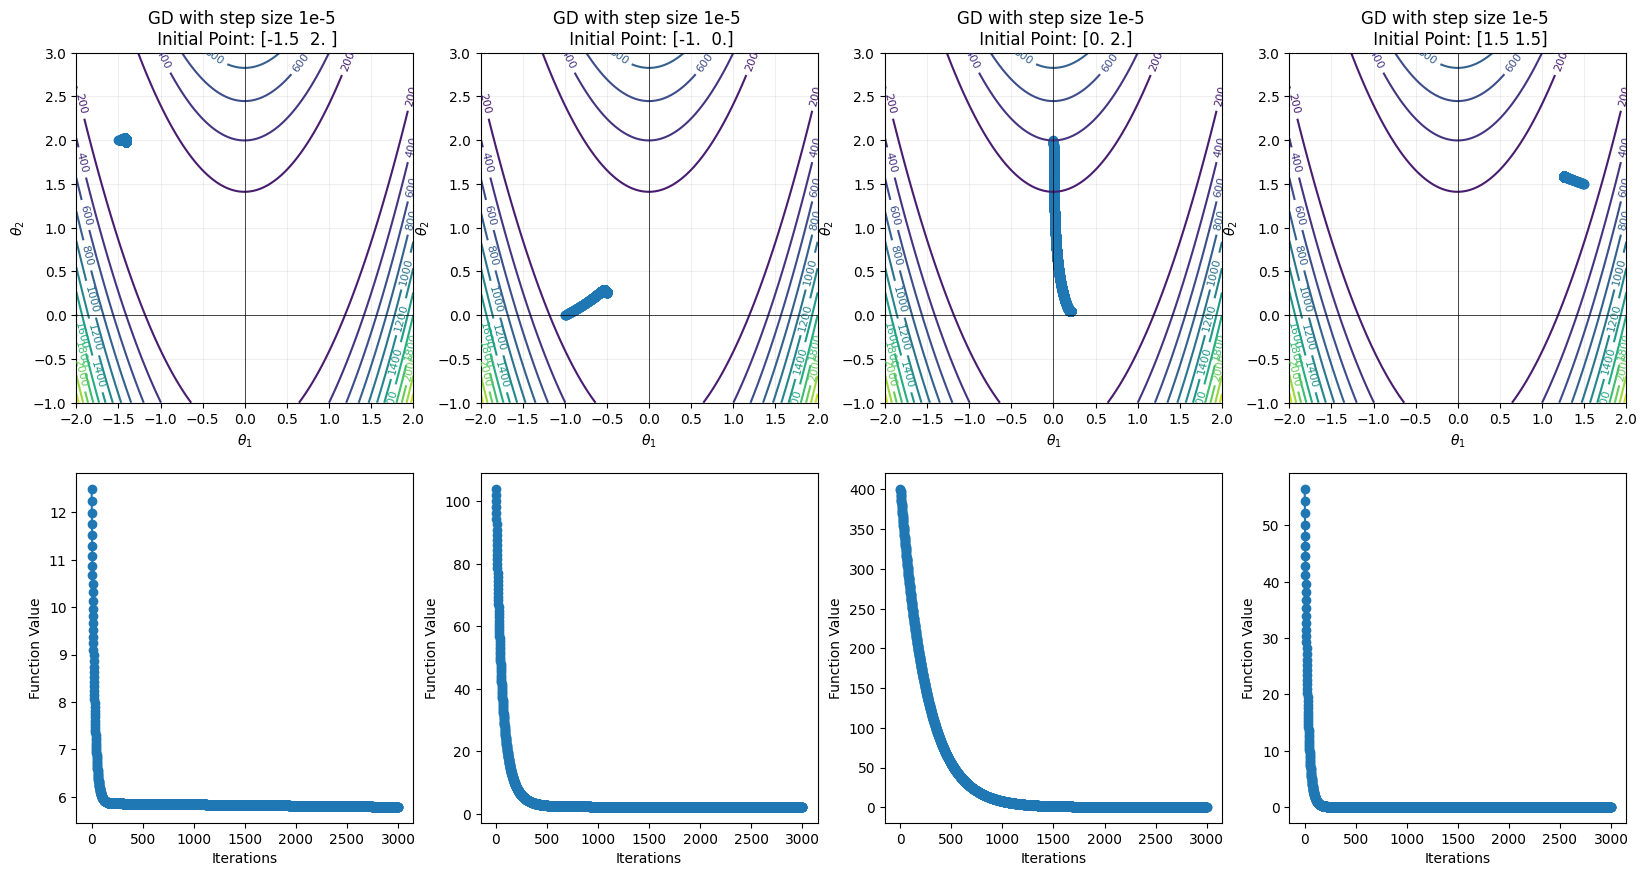

In [176]:

figure, axes = plt.subplots(2, num_points, figsize=(5 * num_points, 10))

for i, theta_0 in enumerate(init_points):

    _, _, x_history, y_history = GD(
        l=L,
        grad_l=grad_L,
        theta_0=theta_0,
        eta=1e-5,
        maxit=max_it,
    )

    axes[0, i].plot([x[0] for x in x_history], [x[1] for x in x_history], marker='o')
    levelsets_rosenbrock(
                   xlim=(-2,2), ylim=(-1,3), axes=axes[0, i],
                   title=f'GD with step size 1e-5 \n Initial Point: {theta_0}', ncontours=15,)

    axes[1, i].plot(range(len(y_history)), y_history, marker='o')
    axes[1, i].set_xlabel('Iterations')
    axes[1, i].set_ylabel('Function Value')

plt.show()

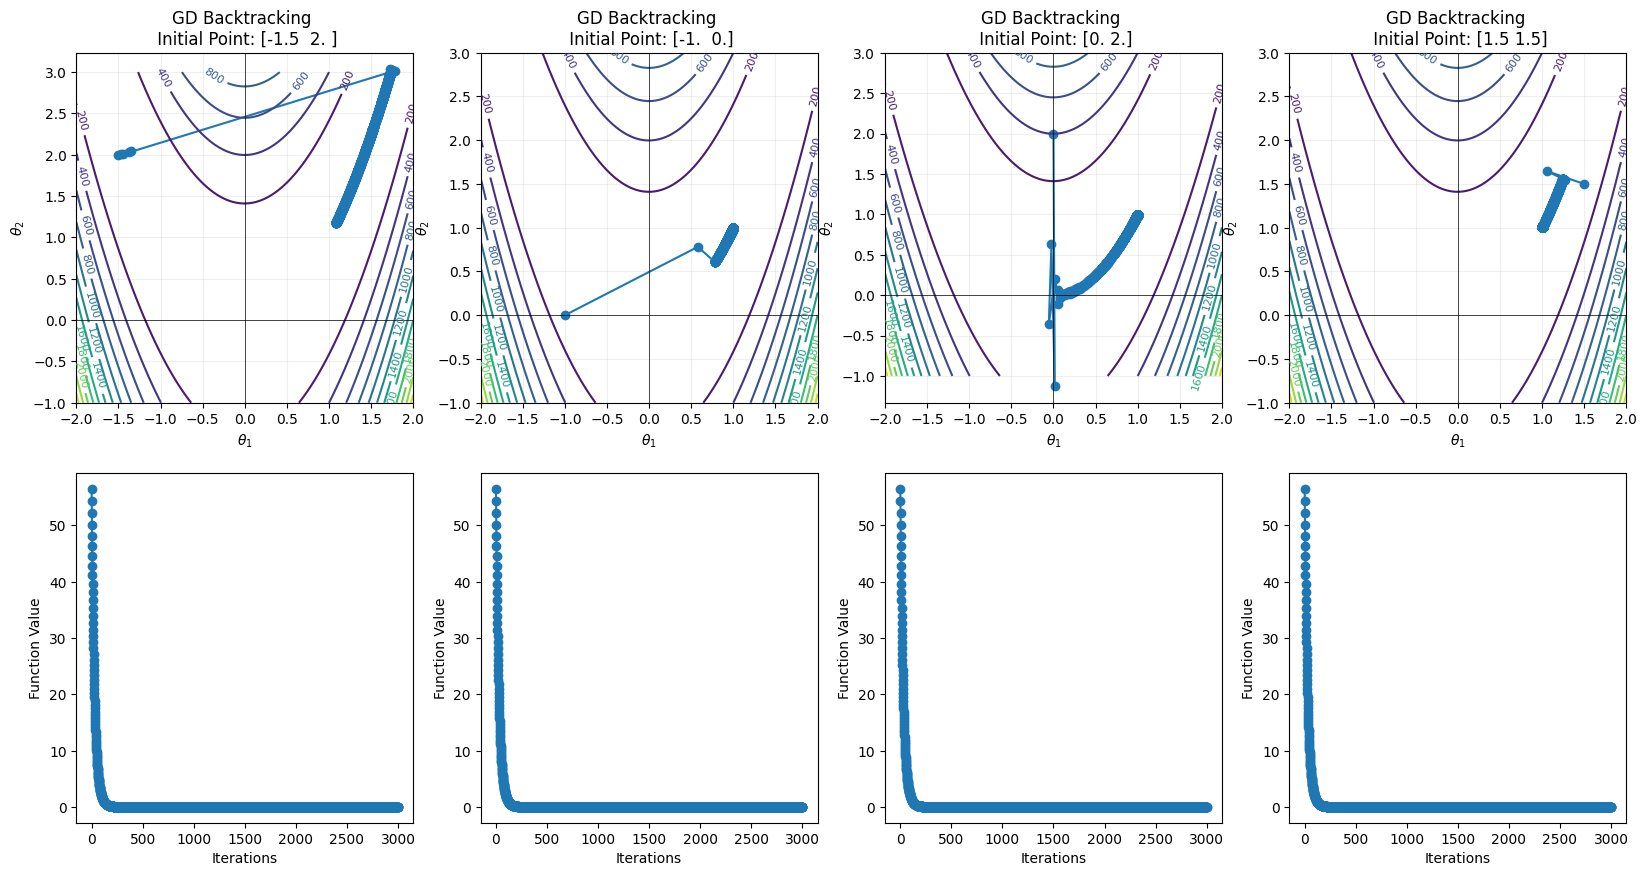

In [177]:

figure, axes = plt.subplots(2, num_points, figsize=(5 * num_points, 10))

for i, theta_0 in enumerate(init_points):

    _, _, x_history_bt, y_history_bt = GD_backtracking(
        l=L,
        grad_l=grad_L,
        theta_0=theta_0,
        maxit=5000,)

    axes[0, i].plot([x[0] for x in x_history_bt], [x[1] for x in x_history_bt], marker='o')
    levelsets_rosenbrock(
                   xlim=(-2,2), ylim=(-1,3), axes=axes[0, i],
                   title=f'GD Backtracking \n Initial Point: {theta_0}', ncontours=15,)

    axes[1, i].plot(range(len(y_history)), y_history, marker='o')
    axes[1, i].set_xlabel('Iterations')
    axes[1, i].set_ylabel('Function Value')


plt.show()